<a href="https://colab.research.google.com/github/aydawudu/ML_with_PyTorch_and_Sklearn/blob/main/Clustering_Anaysis_ML_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Grouping objects by similarity using k-means
### K-means clustering using scikit-learn

In [2]:
#using sample data
from sklearn.datasets import make_blobs

X, y =make_blobs(n_samples=150,
                 n_features=2,
                 centers=3,
                 cluster_std=0.5,
                 shuffle=True,
                 random_state=0)

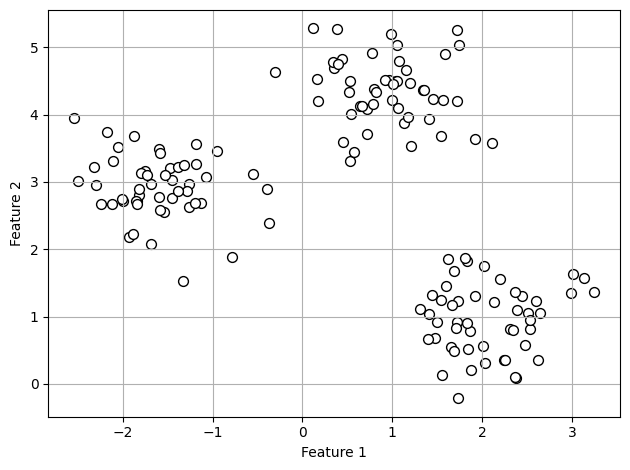

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1],
            c='white', marker='o', edgecolor='black', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.grid()
plt.tight_layout()
plt.show()

In [4]:
#simple k-means clustering analysis
from sklearn.cluster import KMeans

km=KMeans(n_clusters=3,
          init='k-means++',
          n_init=10,
          max_iter=300,
          tol=1e-04,
          random_state=0)

y_km=km.fit_predict(X)

<ipython-input-5-5133b065304c>:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(km.cluster_centers_[:, 0],


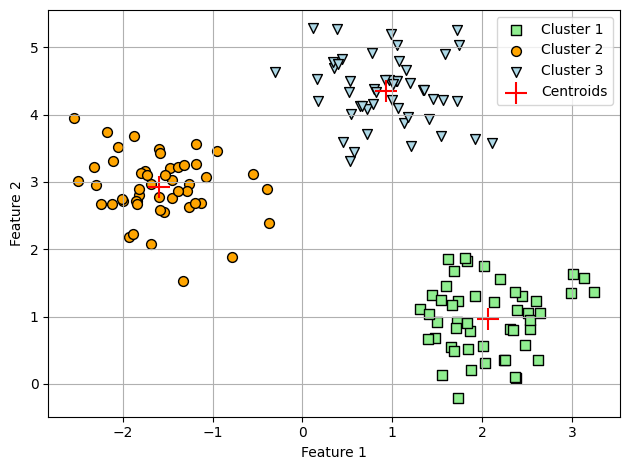

In [5]:
#plot
plt.scatter(X[y_km ==0, 0],
            X[y_km ==0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolors='black',
            label='Cluster 1')
plt.scatter(X[y_km ==1, 0],
            X[y_km ==1, 1],
            s=50, c='orange',
            marker='o', edgecolors='black',
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='+',
            c='red', edgecolor='black',
            label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

## A smarter way of placing the initial cluster centroids using k-means++
...

### Hard versus soft clustering
...

#### Using the elbow method to find the optimal number of clusters

In [6]:
print(f'Distortion: {km.inertia_:.2f}')

Distortion: 72.48


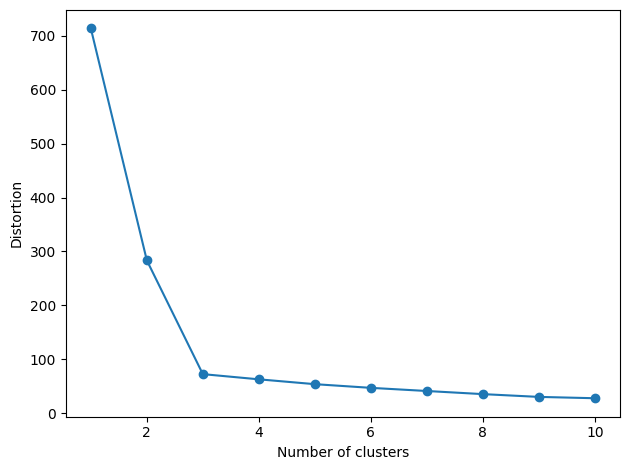

In [7]:
#the optimal number of clusters
distortions=[]
for i in range(1, 11):
  km=KMeans(n_clusters=i,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)
  km.fit(X)
  distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

As the elbow indicate, 3 is the optimal number of clusters

## Quantifying the quality of clustering via silhouette plots

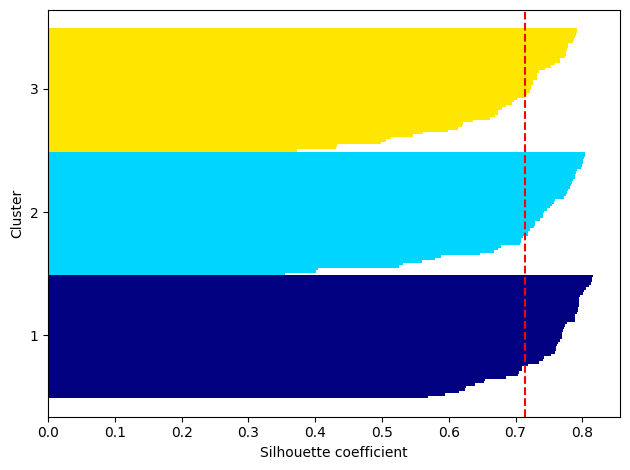

In [15]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km=KMeans(n_clusters=3,
          init='k-means++',
          n_init=10,
          max_iter=300,
          tol=1e-04,
          random_state=0)
y_km=km.fit_predict(X)

cluster_labels=np.unique(y_km)
n_clusters=cluster_labels.shape[0]
silhouette_vals= silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
  c_silhouette_vals=silhouette_vals[y_km == c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color=cm.jet(float(i)/n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
           edgecolor='none', color=color)
  yticks.append((y_ax_lower + y_ax_upper) / 2.)
  y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

Comparison to bad clustering

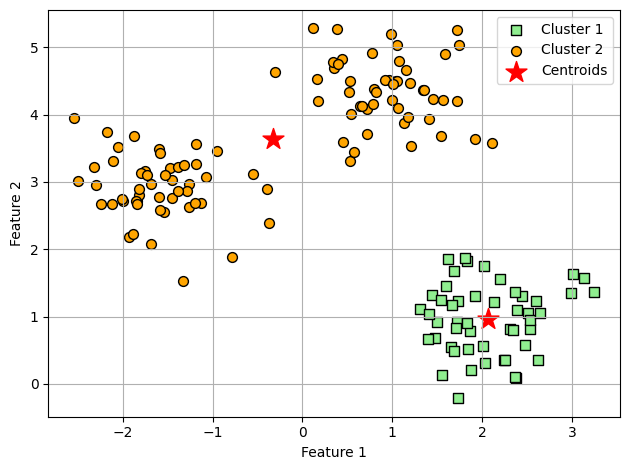

In [16]:
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

#plot the new clustering
plt.scatter(X[y_km ==0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            edgecolor='black',
            marker='s',
            label='Cluster 1')
plt.scatter(X[y_km ==1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            edgecolor='black',
            marker='o',
            label='Cluster 2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

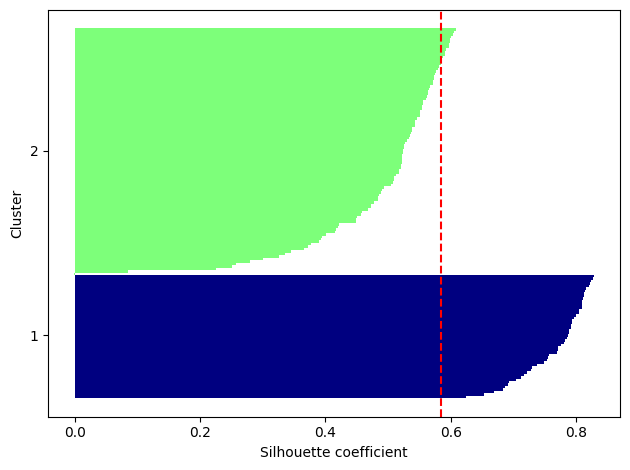

In [28]:
#create a silhouette plot
cluster_labels=np.unique(y_km)
n_clusters=cluster_labels.shape[0]
silhouette_vals=silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper=0, 0
yticks=[]
for i, c in enumerate(cluster_labels):
  c_silhouette_vals=silhouette_vals[y_km==c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color=cm.jet(float(i)/n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
           edgecolor='none', color=color)
  yticks.append((y_ax_lower + y_ax_upper) / 2.)
  y_ax_lower += len(c_silhouette_vals)

silhouette_avg=np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()


has different length and width which shows bad suboptimal clustering

## Organizing clusters as a hierarchical tree
### Grouping clusters in bottom-up fashion

In [31]:
#using generated toy data
import pandas as pd
import numpy as np

np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels= ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_2' ]

X = np.random.random_sample([5, 3]) * 10
df=pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_2,4.385722,0.596779,3.980443


## Performing hierarchical clustering on a distance matrix

In [33]:
#1.calculate pairwise distance matrix of all examples
from scipy.spatial.distance import pdist, squareform

row_dist=pd.DataFrame(squareform(pdist(df, metric='euclidean')), #calculates the euclidean distance between each pair of inputs

                      columns=labels,
                      index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_2
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_2,3.835396,6.698233,8.316594,4.382864,0.000000


In [34]:
#2 represent each data point as a singleton cluster, merge the two closest clusters and update linkage matrix
#1. Incorrect approach: Squareform distance matrix
from scipy.cluster.hierarchy import linkage

row_clusters=linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2', 'distance', 'no. of items in cluster'],
             index=[f'cluster{ (i + 1)}' for i in range(row_clusters.shape[0])])

<ipython-input-34-f0f6eee95564>:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  row_clusters=linkage(row_dist, method='complete', metric='euclidean')


,row label 1,row label 2,distance,no. of items in cluster
cluster1,0.0,4.0,6.521973,2.0
cluster2,1.0,2.0,6.729603,2.0
cluster3,3.0,5.0,8.539247,3.0
cluster4,6.0,7.0,12.444824,5.0


In [36]:
# 2. correct approach: Condensed distance matrix

row_clusters=linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
            index=[f'cluster {(i + 1)}'
                    for i in range(row_clusters.shape[0])])


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [40]:
#3. correct approach: Input matrix

row_clusters=linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label ', 'row label 2', 'distance', 'no.of items in clusters'],
             index=[f'cluster {(i + 1)}' for i in range(row_clusters.shape[0])])

,row label,row label 2,distance,no.of items in clusters
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


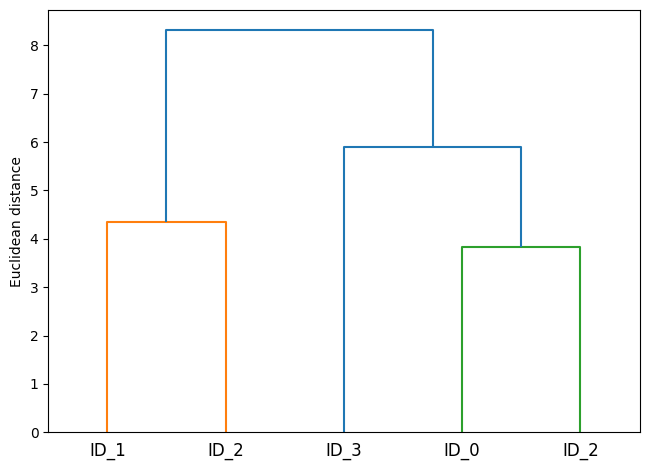

In [41]:
#visulaize using a dendrogram
from scipy.cluster.hierarchy import dendrogram

# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters,
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('figures/10_11.png', dpi=300,
#            bbox_inches='tight')
plt.show()

### Attaching dendrograms to a heat map

<ipython-input-43-2761a4dcfb6a>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_xticklabels(['']+list(df_rowclust.columns))
<ipython-input-43-2761a4dcfb6a>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_yticklabels(['']+list(df_rowclust.index))


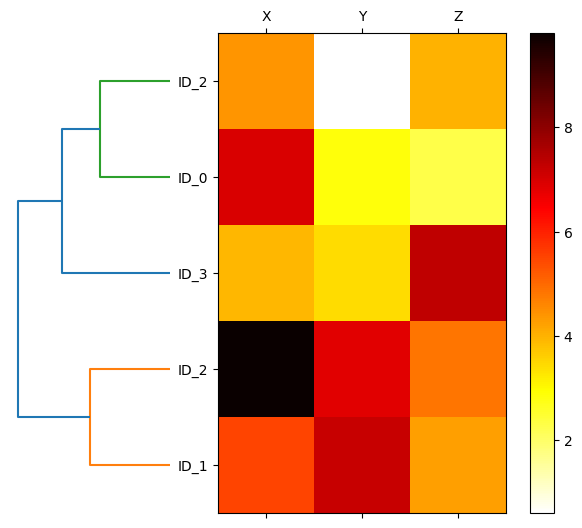

In [43]:
#plot row dendrogram
fig=plt.figure(figsize=(8,8), facecolor='white')
axd=fig.add_axes([0.09, 0.1, 0.2, 0.6])

# note: for matplotlib < v1.5.1, please use orientation='right'
row_dendr=dendrogram(row_clusters, orientation='left')

#reorder data with respect to clustering
df_rowclust=df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

#remove axes spines from dendrogram
for i in axd.spines.values():
  i.set_visible(False)

#plot heatmap
axm =fig.add_axes([0.23, 0.1, 0.6, 0.6]) #x-pos, y-pos, width, height
cax=axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)

axm.set_xticklabels(['']+list(df_rowclust.columns))
axm.set_yticklabels(['']+list(df_rowclust.index))
plt.show()

## Applying agglomerative clustering via scikit-learn

In [44]:
#also choosing the number of clusters we want
from sklearn.cluster import AgglomerativeClustering

ac=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')

labels=ac.fit_predict(X)
print(f'Cluster labels: {labels}')

Cluster labels: [1 0 0 2 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [45]:
ac=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels=ac.fit_predict(X)
print(f'Cluster labels: {labels}')

Cluster labels: [0 1 1 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


### Locating regions of high density via DBSCAN

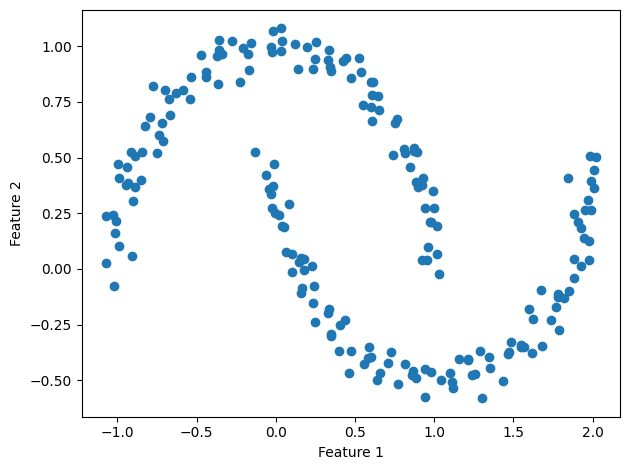

In [46]:
#generate sample data
from sklearn.datasets import make_moons

X, y=make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


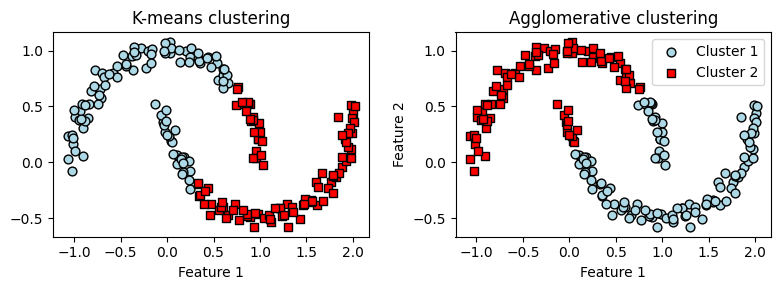

In [50]:
#clustering using K-means and hierarchical clustering:
f, (ax1, ax2)=plt.subplots(1, 2, figsize=(8, 3))

km=KMeans(n_clusters=2, random_state=0)
y_km=km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km==1, 0], X[y_km ==1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ax1.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

ac=AgglomerativeClustering(n_clusters=2,
                           affinity='euclidean',
                           linkage='complete')
y_ac=ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac==0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='Cluster 1')
ax2.scatter(X[y_ac==1, 0], X[y_ac==1,1], c='red', edgecolor='black',
            marker='s', s=40, label='Cluster 2')
ax2.set_title('Agglomerative clustering')

ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

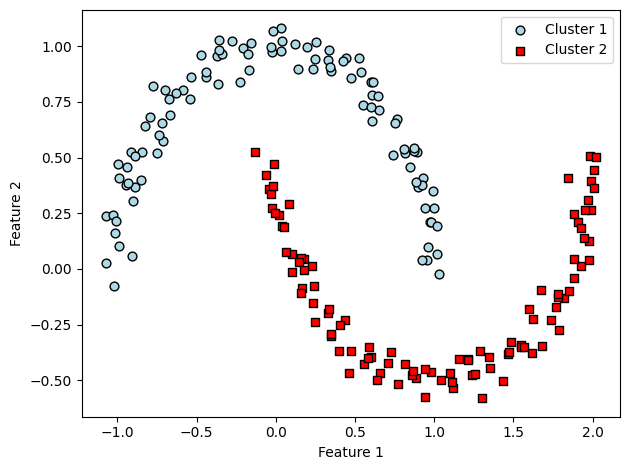

In [53]:
#Density-based clustering (DBSCAN)
from sklearn.cluster import DBSCAN

db=DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db=db.fit_predict(X)
plt.scatter(X[y_db == 0,0], X[y_db == 0, 1], c='lightblue',
            marker='o', s=40, edgecolor='black', label='Cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db ==1, 1],
            c='red', marker='s', s=40, edgecolor='black', label='Cluster 2')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend()
plt.tight_layout()
plt.show()